# Perceptrón

Luis Eduardo Gonzalez Quiroz, A01751188

Importamos las bibliotecas que usaremos.

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Definimos nuestra función Perceptrón.

In [ ]:
def perceptron(X, Y, lr, epochs):
    # No de samples
    n = X.shape[1]

    # Inicializamos array de pesos con n elementos, mas un bias
    W = np.zeros((n+1,1))
    
    # Iteramos por cada epoch
    for epoch in range(epochs):
        # Iteramos por cada sample
        for idx, x_i in enumerate(X):
            
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)
            
            # Calc hipotesis.
            z = np.dot(x_i.T, W)
            y_hat = (1 / (1 + np.exp(-z)))
            
            # Actualizar pesos si hipotesis es incorrecta.
            if (np.squeeze(y_hat) != Y[idx]):
                W += lr*((Y[idx] - y_hat)*x_i)
    return W

Con esta función calculamos el accuracy de nuestro modelo con el subset de testing.

In [ ]:
def calc_accuracy(X, Y):
    correct_count = 0
    for i_sample, x_i in enumerate(X):
        x0 = x_i[1]
        x1 = x_i[0]
        z = (x0)*(W[0]) + (x1)*(W[1]) + W[2]
        y_pred = (1 / (1 + np.exp(-z)))
        if(round(y_pred[0]) == Y[i_sample]):
            correct_count += 1
    accuracy = correct_count*100/(i_sample+1)
    return accuracy

Función para graficar el hiperplano definido por nuestro Perceptrón.

In [ ]:
def plot_decision_boundary(X, W):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -W[1]/W[2]
    c = -W[0]/W[2]
    x2 = m*x1 + c
    
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "r^")
    plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptrón')
    plt.plot(x1, x2, 'g-')

Se genera el dataset con dos features por cada sample, y 250 samples distribuidos en dos centroides con una desviación estandar de 1.05

In [ ]:
N_SAMPLES = 250
X, Y = datasets.make_blobs(n_samples=N_SAMPLES,n_features=2,centers=2,cluster_std=1.05,random_state=3)

Text(0.5, 1.0, 'Clasificacion aleatoria con dos clases')

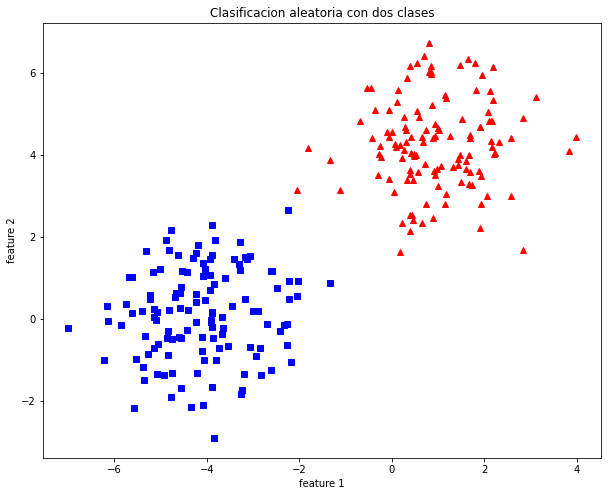

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][Y == 0], X[:, 1][Y == 0], 'r^')
plt.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Clasificacion aleatoria con dos clases')

Probamos diferentes epochs para entrenar nuestro modelo, y utilizamos validación cruzada para validar el accuracy de nuestro modelo.

In [ ]:
N_PARTITIONS = 10

lista_avg_accuracy_epochs = []
for epochs in range(0, 101, 10):
    epochs = epochs if epochs != 0 else 1
    DIV = round(N_SAMPLES/N_PARTITIONS)
    lista_accuracy_tests = []
    for i, lower_limit in enumerate(range(1, N_SAMPLES, DIV)):
        upper_limit = lower_limit + DIV - 1
        X_TRAIN = np.concatenate((X[:lower_limit-1], X[upper_limit:]), axis = 0)
        Y_TRAIN = np.concatenate((Y[:lower_limit-1], Y[upper_limit:]), axis = 0)
        X_TEST = X[lower_limit-1:upper_limit]
        Y_TEST = Y[lower_limit-1:upper_limit]

        W = perceptron(X_TRAIN, Y_TRAIN, 0.5, epochs)

        accuracy = round(calc_accuracy(X_TEST, Y_TEST), 2)
        lista_accuracy_tests.append(accuracy)
        #print(f"Test {i+1}: Accuracy = {accuracy}%\n")

    avg_accuracy = round(sum(lista_accuracy_tests)/N_PARTITIONS, 2)
    lista_avg_accuracy_epochs.append(avg_accuracy)
    print(f"Accuracy promedio con {epochs} epochs = {avg_accuracy}%\n")

Accuracy promedio con 1 epochs = 97.2%

Accuracy promedio con 10 epochs = 96.4%

Accuracy promedio con 20 epochs = 94.8%

Accuracy promedio con 30 epochs = 93.2%

Accuracy promedio con 40 epochs = 92.8%

Accuracy promedio con 50 epochs = 92.8%

Accuracy promedio con 60 epochs = 92.8%

Accuracy promedio con 70 epochs = 92.0%

Accuracy promedio con 80 epochs = 92.0%

Accuracy promedio con 90 epochs = 92.0%

Accuracy promedio con 100 epochs = 92.0%



Graficamos el accuracy del modelo con diferentes epochs durante entrenamiento

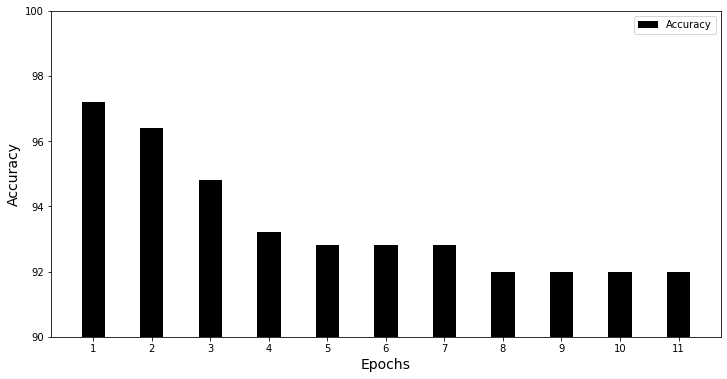

In [ ]:
plt.figure(figsize=(12,6))
X_axis = np.arange(len(np.array(lista_avg_accuracy_epochs)))
ax = plt.gca()
plt.ylim(90, 100)
plt.bar(X_axis, np.array(np.array(lista_avg_accuracy_epochs)), 0.4, color='black', label='Accuracy')
plt.xticks(X_axis, range(1,len(np.array(lista_avg_accuracy_epochs))+1))
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()
plt.show()

Utilizamos un epoch=1 para entrenar nuestro modelo (pues fue el que tuvo mejor desempeño).

In [ ]:
epochs = 1
DIV = round(N_SAMPLES/N_PARTITIONS)
lista_accuracy_tests = []
for i, lower_limit in enumerate(range(1, N_SAMPLES, DIV)):
    upper_limit = lower_limit + DIV - 1
    X_TRAIN = np.concatenate((X[:lower_limit-1], X[upper_limit:]), axis = 0)
    Y_TRAIN = np.concatenate((Y[:lower_limit-1], Y[upper_limit:]), axis = 0)
    X_TEST = X[lower_limit-1:upper_limit]
    Y_TEST = Y[lower_limit-1:upper_limit]

    W = perceptron(X_TRAIN, Y_TRAIN, 0.5, epochs)

    accuracy = round(calc_accuracy(X_TEST, Y_TEST), 2)
    lista_accuracy_tests.append(accuracy)
    print(f"K-Fold {i+1}: Accuracy = {accuracy}%\n")

K-Fold 1: Accuracy = 96.0%

K-Fold 2: Accuracy = 100.0%

K-Fold 3: Accuracy = 96.0%

K-Fold 4: Accuracy = 96.0%

K-Fold 5: Accuracy = 96.0%

K-Fold 6: Accuracy = 100.0%

K-Fold 7: Accuracy = 100.0%

K-Fold 8: Accuracy = 88.0%

K-Fold 9: Accuracy = 100.0%

K-Fold 10: Accuracy = 100.0%



Graficamos la variación entre cada K-Fold de nuestra validación cruzada.

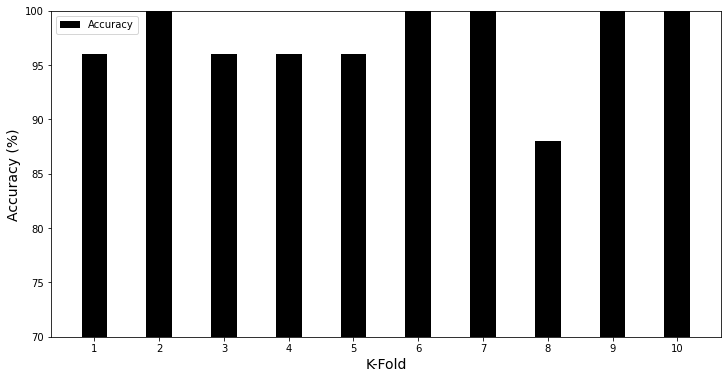

In [ ]:
plt.figure(figsize=(12,6))
X_axis = np.arange(len(np.array(lista_accuracy_tests)))
ax = plt.gca()
plt.ylim(70, 100)
plt.bar(X_axis, np.array(np.array(lista_accuracy_tests)), 0.4, color='black', label='Accuracy')
plt.xticks(X_axis, range(1,len(np.array(lista_accuracy_tests))+1))
plt.xlabel("K-Fold", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend()
plt.show()

Resultados finales de nuestro modelo:

In [ ]:
lista_accuracy_tests_np = np.array(lista_accuracy_tests)
x_mean= lista_accuracy_tests_np.mean()
sum_x = 0
for x_i in lista_accuracy_tests_np:
    sum_x += (x_i - x_mean)**2
std_dev = np.sqrt(sum_x/(len(lista_accuracy_tests_np)-1))
variance = std_dev**2

print(f"Accuracy promedio: {lista_accuracy_tests_np.mean()}%")
print(f"Desviación estandar: {std_dev:.5}")
print(f"Varianza: {variance:.4}")

Accuracy promedio: 97.2%
Desviación estandar: 3.7947
Varianza: 14.4


Grafico con hiperplano generado por nuestro Perceptrón dividiendo nuestro dataset.

Nótese que en general el hiperplano es bastante bueno en dividir ambos grupos, sin embargo algúnos de ellos sí se muestran erroneamente clasificados.

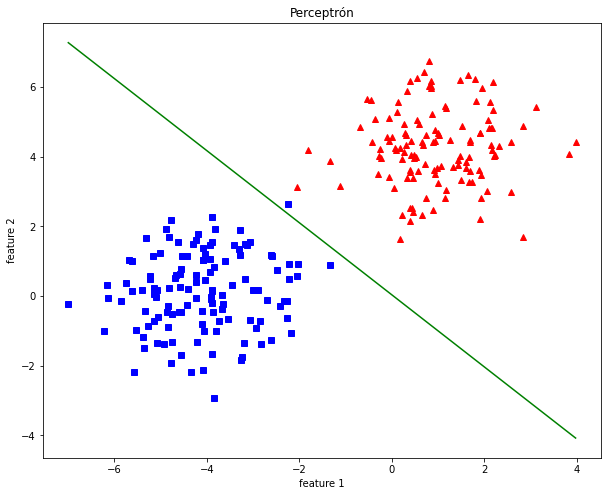

In [ ]:
plot_decision_boundary(X, W)